# 6. Analysing Sales Performance by Region in a Retail Company
 ● Import the "Retail_Sales_Data.csv" dataset.
 ● Identify the relevant variables for aggregating sales data, such as region, sales
 amount, and product category.
 ● Group the sales data by region and calculate the total sales amount for each
 region.
 ● Create bar plots or pie charts to visualise the sales distribution by region.
 ● Identify the top-performing regions based on the highest sales amount.
 ● Group the sales data by region and product category to calculate the total sales
 amount for each combination.
 ● Create stacked bar plots or grouped bar plots to compare the sales amounts
 across different regions and product categories.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv('Retail_Sales_Data.csv')

In [99]:
df

,Transaction_ID,Customer_ID,State,Age,Shop_Category,Sales,Gender,Items_in_basket
0,1,1234,MP,10,Grocery,10,M,2
1,2,1235,UP,21,Dairy,30,F,3
2,3,1236,AP,23,Deli,23,F,4
3,4,1237,RP,25,Meat,21,F,4
4,5,1238,DP,27,Clothes,90,F,3
...,...,...,...,...,...,...,...,...
307,308,9966,RP,46,Clothes,349,M,3
308,309,9968,DP,48,Electronics,369,M,4
309,310,9970,DP,50,Clothes,389,M,4
310,311,9972,DP,52,Electronics,409,M,5


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction_ID   312 non-null    int64 
 1   Customer_ID      312 non-null    int64 
 2   State            312 non-null    object
 3   Age              312 non-null    int64 
 4   Shop_Category    312 non-null    object
 5   Sales            312 non-null    int64 
 6   Gender           312 non-null    object
 7   Items_in_basket  312 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 19.6+ KB


In [101]:
df.isnull().sum()

Transaction_ID     0
Customer_ID        0
State              0
Age                0
Shop_Category      0
Sales              0
Gender             0
Items_in_basket    0
dtype: int64

### Step 4: Aggregate Sales Data by Region

In [116]:
region_sales=df.groupby('State')['Sales'].sum().reset_index()

In [117]:
region_sales

,State,Sales
0,AP,12176
1,DP,23346
2,KP,10887
3,MP,4916
4,RP,11049
5,UP,4072


### Step 5: Visualize Sales Distribution by Region

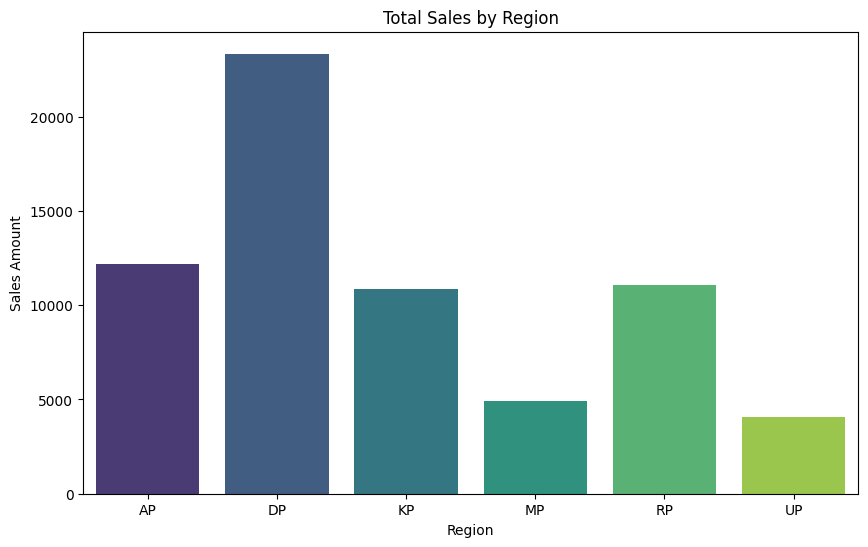

In [118]:
# Bar plot for sales by region
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='State', y='Sales', palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.show()

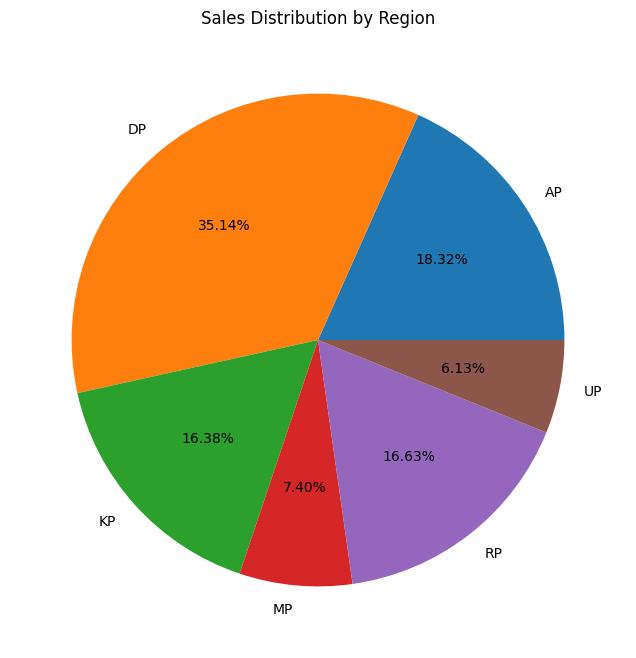

In [131]:
# Pie chart for sales by region
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['State'], autopct='%1.2f%%')
plt.title('Sales Distribution by Region')
plt.show()

### Step 6: Identify Top-Performing Regions

In [120]:
# Sort regions by sales amount in descending order
top_regions = region_sales.sort_values(by='Sales', ascending=False)

In [121]:
top_regions

,State,Sales
1,DP,23346
0,AP,12176
4,RP,11049
2,KP,10887
3,MP,4916
5,UP,4072


### Step 7: Aggregate Sales by Region and Product Category

In [133]:
# Group by region and product category
region_category_sales = df.groupby(['State', 'Shop_Category'])['Sales'].sum().unstack()

# Display the result
region_category_sales

Shop_Category,Clothes,Dairy,Deli,Electronics,Grocery,Meat
State,,,,,,
AP,2127.0,1197.0,1303.0,3818.0,823.0,2908.0
DP,7133.0,6027.0,1723.0,4645.0,1736.0,2082.0
KP,3581.0,630.0,2595.0,2742.0,54.0,1285.0
MP,711.0,NaN,1144.0,696.0,950.0,1415.0
RP,2167.0,74.0,1006.0,3087.0,2452.0,2263.0
UP,1077.0,816.0,87.0,500.0,729.0,863.0


### Step 8: Visualize Sales by Region and Product Category

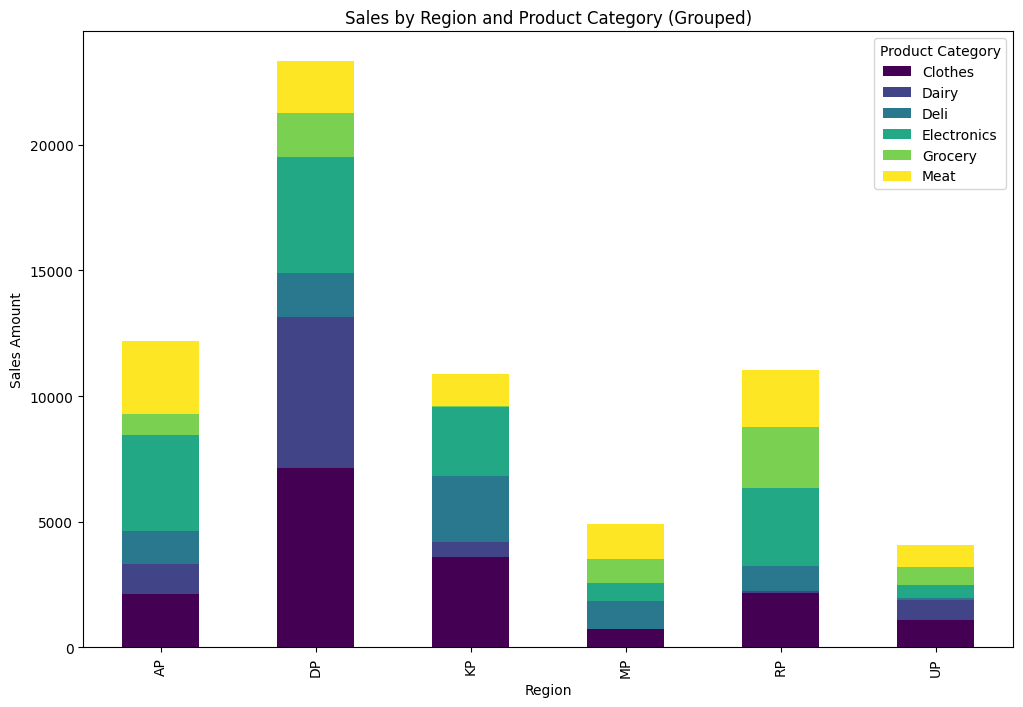

In [123]:
# Stacked bar plot for sales by region and product category
region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sales by Region and Product Category (Grouped)')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.legend(title='Product Category')
plt.show()

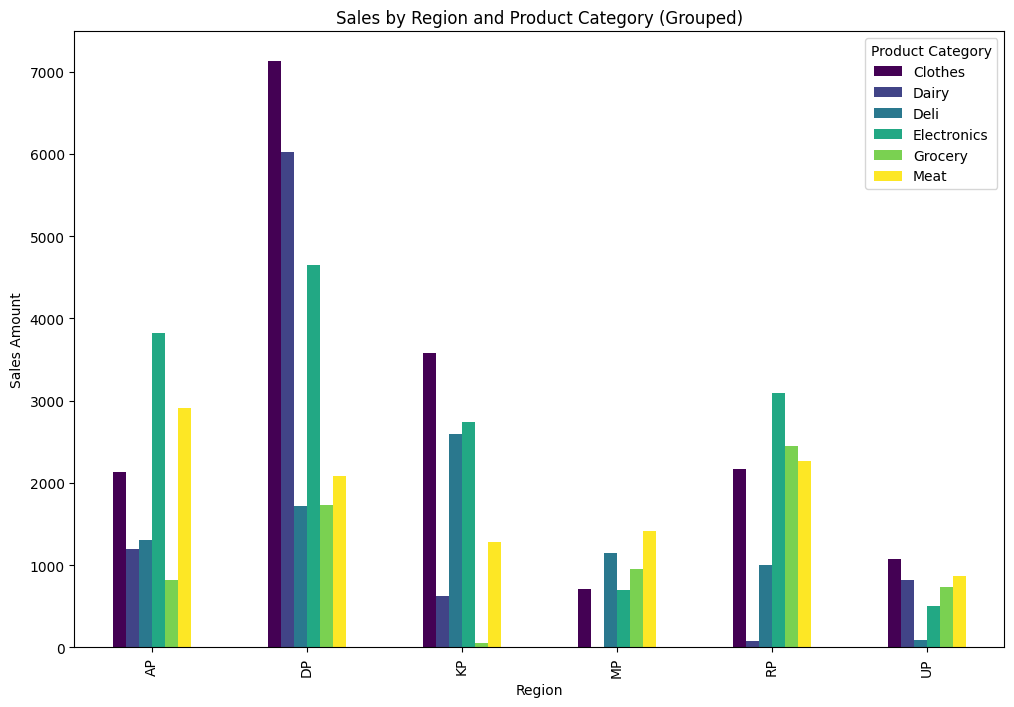

In [124]:
# Grouped bar plot
region_category_sales.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')
plt.title('Sales by Region and Product Category (Grouped)')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.legend(title='Product Category')
plt.show()